In [1]:
import akshare as ak
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import os

%matplotlib inline

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 设置字体
plt.rcParams["axes.unicode_minus"] = False    # 该语句解决图像中的“-”负号的乱码问题

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',200)

today = datetime.now().date()   #.strftime('%Y-%m-%d')
ten_years_ago = today - timedelta(days=10*365)
five_years_ago = today - timedelta(days=5*365)
three_yeas_ago = today - timedelta(days=3*365)
one_year_ago = today - timedelta(days=365)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [2]:
def show_index(symbol, name, from_date:datetime, ax=None):
    stock_zh_index_daily_em_df = ak.stock_zh_index_daily_em(symbol=symbol)
    stock_zh_index_daily_em_df.set_index('date', inplace=True)
    stock_zh_index_daily_em_df.index = pd.to_datetime(stock_zh_index_daily_em_df.index)   
    stock_zh_index_daily_em_df = stock_zh_index_daily_em_df[stock_zh_index_daily_em_df.index > pd.to_datetime(from_date)]
    stock_zh_index_daily_em_df['close'].plot(grid=True, title=name, ax=ax)

def show_hk_index(symbol, name, from_date:datetime, ax=None):
    stock_hk_index_daily_sina_df = ak.stock_hk_index_daily_sina(symbol)
    stock_hk_index_daily_sina_df.set_index('date', inplace=True)
    stock_hk_index_daily_sina_df.index = pd.to_datetime(stock_hk_index_daily_sina_df.index)   
    stock_hk_index_daily_sina_df = stock_hk_index_daily_sina_df[stock_hk_index_daily_sina_df.index > pd.to_datetime(from_date)]
    stock_hk_index_daily_sina_df['close'].plot(grid=True, title=name, ax=ax)
    
def show_index_pe(symbol, name, from_date:datetime, ax=None):
    stock_index_pe_lg_df  = ak.stock_index_pe_lg(symbol=symbol)
    stock_index_pe_lg_df.set_index('日期', inplace=True)
    stock_index_pe_lg_df.index = pd.to_datetime(stock_index_pe_lg_df.index)   
    stock_index_pe_lg_df = stock_index_pe_lg_df[stock_index_pe_lg_df.index > pd.to_datetime(from_date)]
    stock_index_pe_lg_df['滚动市盈率'].plot(grid=True, title=name, ax=ax)
    
def show_hs_300(from_date:datetime):    
    stock_zh_index_daily_em_df = ak.stock_zh_index_daily_em(symbol='sh000300')
    stock_zh_index_daily_em_df['date'] = pd.to_datetime(stock_zh_index_daily_em_df['date'])   
    stock_zh_index_daily_em_df = stock_zh_index_daily_em_df[stock_zh_index_daily_em_df['date'] > pd.to_datetime(from_date)]
    x = stock_zh_index_daily_em_df['date']
    y1 = stock_zh_index_daily_em_df['close']

    stock_index_pe_lg_df  = ak.stock_index_pe_lg(symbol='沪深300')
    stock_index_pe_lg_df['日期'] = pd.to_datetime(stock_index_pe_lg_df['日期'])   
    stock_index_pe_lg_df = stock_index_pe_lg_df[stock_index_pe_lg_df['日期'] > pd.to_datetime(from_date)]
    y2 = stock_index_pe_lg_df['滚动市盈率']
    
    fig, ax1 = plt.subplots()
    ax1.plot(x, y1, 'b-')
    ax1.set_xlabel('date')
    ax1.set_ylabel('index', color='b')
    for tl in ax1.get_yticklabels():
        tl.set_color('b')
    ax1.grid(True, axis='x') 
        
    ax2 = ax1.twinx()
    ax2.plot(x, y2, 'g-')
    ax2.set_ylabel('PE-TTM', color='g')
    for tl in ax2.get_yticklabels():
        tl.set_color('g')
        
    plt.title('沪深300')
        
def show_csi_500(from_date:datetime):    
    stock_zh_index_daily_em_df = ak.stock_zh_index_daily_em(symbol='sh000905')
    stock_zh_index_daily_em_df['date'] = pd.to_datetime(stock_zh_index_daily_em_df['date'])   
    stock_zh_index_daily_em_df = stock_zh_index_daily_em_df[stock_zh_index_daily_em_df['date'] > pd.to_datetime(from_date)]
    x = stock_zh_index_daily_em_df['date']
    y1 = stock_zh_index_daily_em_df['close']

    stock_index_pe_lg_df  = ak.stock_index_pe_lg(symbol='中证500')
    stock_index_pe_lg_df['日期'] = pd.to_datetime(stock_index_pe_lg_df['日期'])   
    stock_index_pe_lg_df = stock_index_pe_lg_df[stock_index_pe_lg_df['日期'] > pd.to_datetime(from_date)]
    y2 = stock_index_pe_lg_df['滚动市盈率']
    
    fig, ax1 = plt.subplots()
    ax1.plot(x, y1, 'b-')
    ax1.set_xlabel('date')
    ax1.set_ylabel('index', color='b')
    for tl in ax1.get_yticklabels():
        tl.set_color('b')
    ax1.grid(True, axis='x') 
        
    ax2 = ax1.twinx()
    ax2.plot(x, y2, 'g-')
    ax2.set_ylabel('PE-TTM', color='g')
    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    plt.title('中证500')

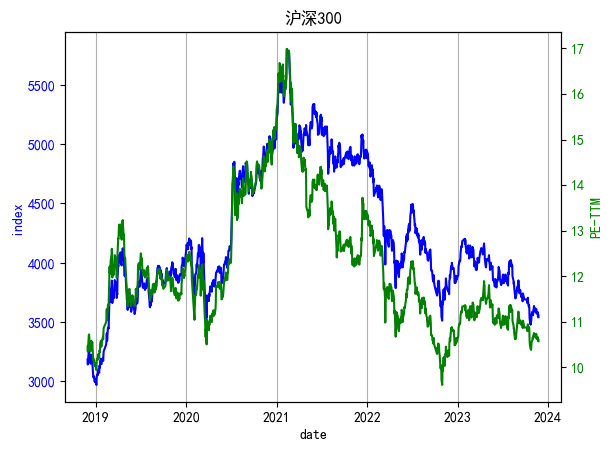

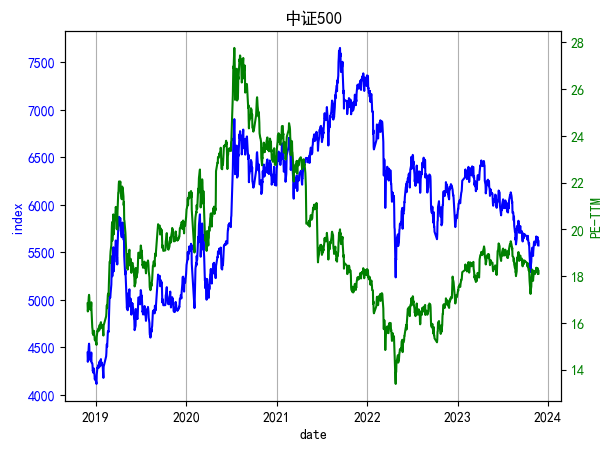

In [3]:
show_hs_300(five_years_ago)
show_csi_500(five_years_ago)

In [4]:
# fig, axs = plt.subplots(2, 2, figsize=(16, 12))
# show_index("sh000300", '沪深300指数-5年', five_years_ago, axs[0, 0])
# show_index("sh000905", '中证500指数-5年', five_years_ago, axs[0, 1])
# show_index_pe('沪深300', '沪深300PE-TTM', five_years_ago, axs[1, 0])
# show_index_pe('中证500', '中证500PE-TTM', five_years_ago, axs[1, 1])
# plt.show()

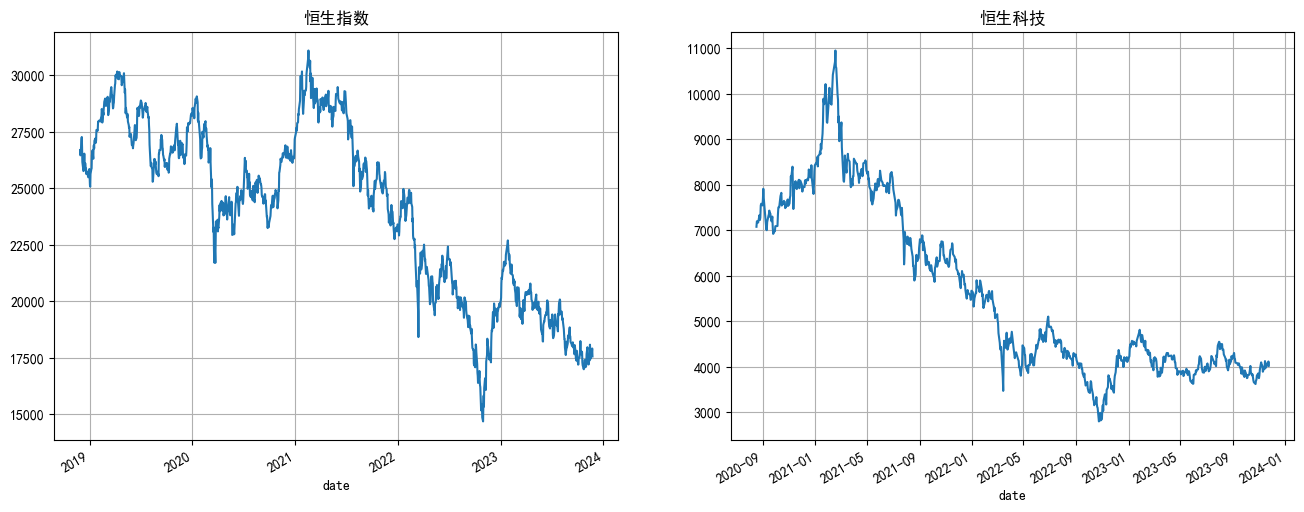

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
show_hk_index('HSI', '恒生指数', five_years_ago, ax=axs[0])
show_hk_index('HSTECH', '恒生科技', five_years_ago, ax=axs[1])
plt.show()